# Heatmaps 

### What can you do with this Notebook?

* Heatmaps are a helpful way to see the big picture. This notebook allows you to plot notes and ngrams across an entire piece, with identical items represented in the same color. 
* Results can be limited in various ways:  clicking to highlight, passing a 'top ten', or even a single pattern to the mapping tool.
* It is also possible to map patterns according to their **similarlity score** using Levenshtein edit-distance calculations. 

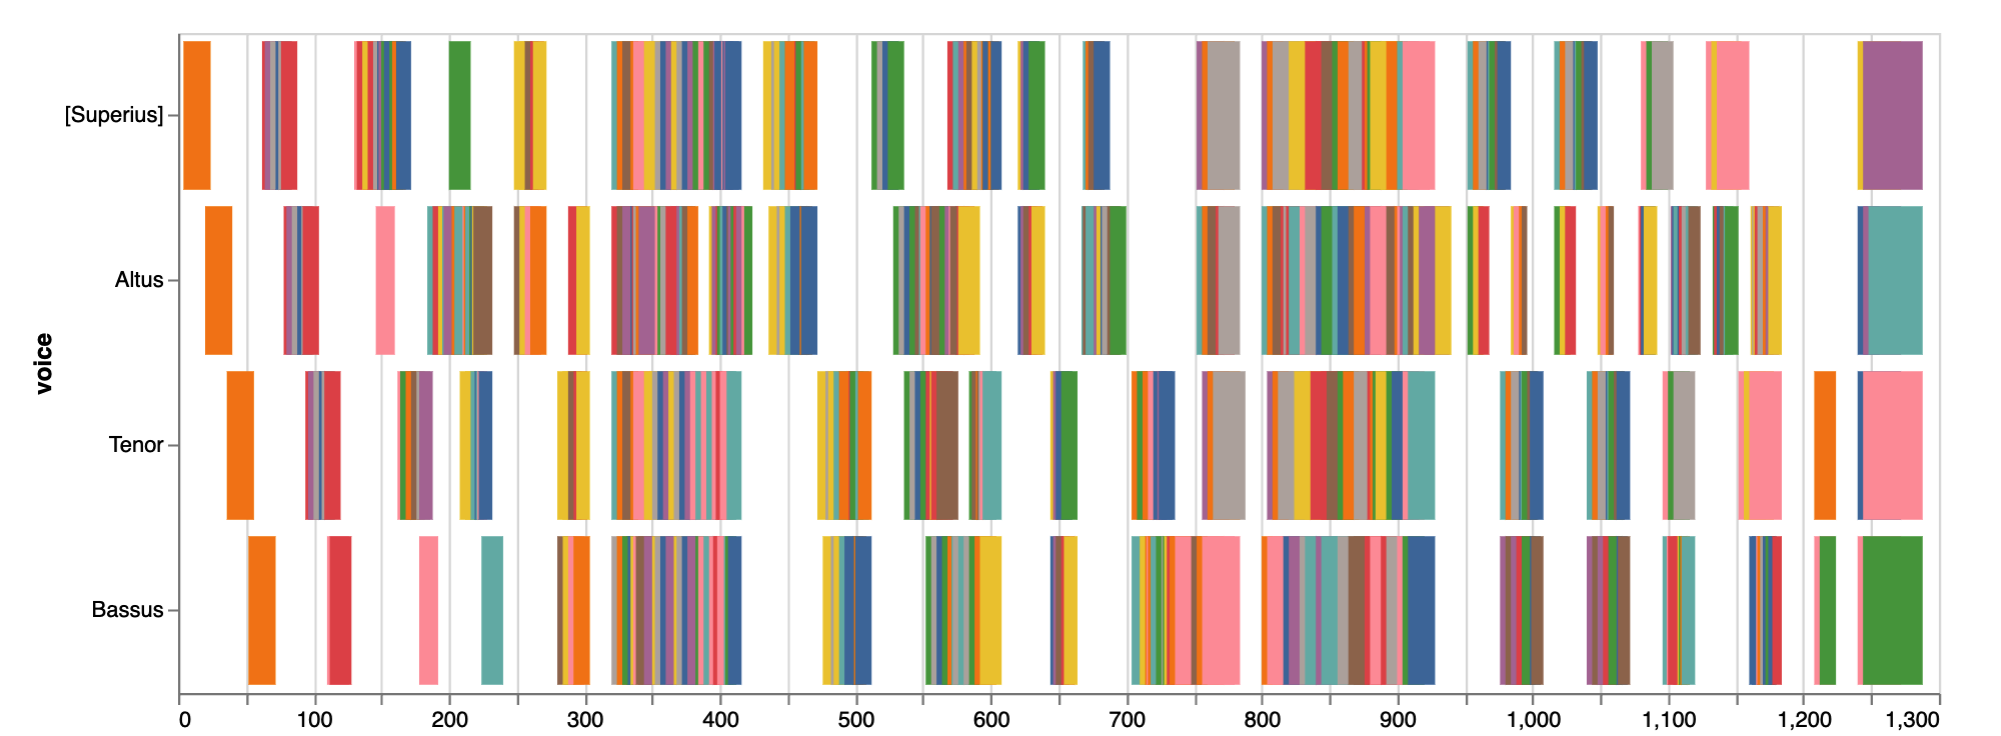

## A.1.  Import Code

In [92]:
# python imports
import pandas as pd
import altair as alt
import requests
import numpy as np

# our imports
import intervals
from intervals import importScore 
import intervals.visualizations as viz
from ipywidgets import interact


## A. Heatmap of Notes 

* Here we get all notes, then fill the Rests and NaN's with "-" (so they are ignored).
* We also get the duration of each note, which is also rendered on the heatmap.
* Clik on any combination of notes in the top of the chart to limit the heatmap to just those pitches.

Get the piece:

>`prefix = 'https://crimproject.org/mei/'    
mei_file = 'CRIM_Model_0008.mei'
url = prefix + mei_file
piece = importScore(url)
print(piece.metadata)`

Get the notes and durations:

>`notes = piece.notes()
notes_durs = piece.durations(df=notes, mask_df=notes)
notes.replace("Rest", np.nan, inplace=True)`

Then create the map:

>`viz.plot_ngrams_heatmap(notes, notes_durs, selected_patterns=[], voices=[])`


In [93]:
prefix = 'https://crimproject.org/mei/'    
mei_file = 'CRIM_Model_0008.mei'
url = prefix + mei_file
piece = importScore(url)
print(piece.metadata)

Previously imported piece detected.
{'title': 'Ave Maria', 'composer': 'Josquin Des Prés'}


In [94]:
notes = piece.notes()
notes_durs = piece.durations(df=notes, mask_df=notes)
notes.replace("Rest", np.nan, inplace=True)

In [95]:
viz.plot_ngrams_heatmap(notes, notes_durs, selected_patterns=[], voices=[])

alt.VConcatChart(...)

## B. nGram Heatmap


* The heatmap tool can plot ngrams in various ways:

    * **All ngrams** (you can click on one or more to limit the results)
    * **Limit to Entries** (which shows only ngrams that occur after a rest or section break). Default is True
    * **Combine Unisons** (note that ngrams in effect become shorter when this is True).  Default is False
    * **Interval Type** (diatonic, chromatic, etc).  Default is diatonic.
    * **Compound or Simple melodic intervals**. Default is False
    * **Length of ngrams**.  Default is 5
    * **Find ngrams by some regular duration**.  `0` is without regularization (default_.  `2` regularizes to half-note, `4` to the whole note, etc.  Note that this does NOT work with Limit to Entries!
    * **Select Most Frequent Patterns**.  "All" will return all the patterns for the given selection.  "5", "10", etc, will return only the most 5 or 10 most frequent ngrams (according to the other criteria already selected)

* Read the documentation with `help(viz_demo.plot_ngrams_heatmap)`

>`@interact
def get_plot(entries_only = [True, False],
             combine_unisons=[False, True], 
             kind=["d", "q", "c", "z"], 
             compound=[True, False], 
             length=[5, 2, 3, 4, 6],
            regularize=[0, 1, 2, 4],
            top_patterns=["all", 5, 10, 20]):
    if entries_only == True:
        nr = piece.notes(combineUnisons=combine_unisons)
        # unit MUST be 0 for "limit to entries" 
        mel = piece.melodic(df=nr, kind=kind, compound=compound, unit=0, end=False)
        mel_ngrams = piece.ngrams(df=mel, n=length)
        entry_ngrams = piece.entries(df=mel, n=length)
        mel_ngrams_duration = piece.durations(df=mel, n=length, mask_df=entry_ngrams)
        if top_patterns == "all":
            return viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=[], voices=[])
        else:
            mel_ngrams_top_patterns_df = entry_ngrams.stack().value_counts().to_frame().head(top_patterns)
            mel_ngrams_top_patterns_list = mel_ngrams_top_patterns_df.index.to_list()
            return viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=mel_ngrams_top_patterns_list, voices=[])
    else:
        if top_patterns == "all":
            nr = piece.notes(combineUnisons=combine_unisons)
            mel = piece.melodic(df=nr, kind=kind, compound=False, unit=regularize, end=False)
            mel_ngrams = piece.ngrams(df=mel, n=length)
            mel_ngrams_duration = piece.durations(df=mel, n=5, mask_df=mel_ngrams)
            return viz.plot_ngrams_heatmap(mel_ngrams, mel_ngrams_duration, selected_patterns=[], voices=[])           
        else:
            mel = piece.melodic(kind='d', compound=False, unit=regularize)
            mel_ngrams = piece.ngrams(df=mel, n=5)
            mel_ngrams_duration = piece.durations(df=mel, n=5, mask_df=mel_ngrams)
            mel_ngrams_top_patterns_df = mel_ngrams.stack().value_counts().to_frame().head(top_patterns)
            mel_ngrams_top_patterns_list = mel_ngrams_top_patterns_df.index.to_list()
            return viz.plot_ngrams_heatmap(mel_ngrams, mel_ngrams_duration, selected_patterns=mel_ngrams_top_patterns_list, voices=[])`



In [97]:
prefix = 'https://crimproject.org/mei/' 
# prefix = 'Music_Files/'
mei_file = 'CRIM_Model_0001.mei'
url = prefix + mei_file
piece = importScore(url)
print(piece.metadata)


Previously imported piece detected.
{'title': 'Veni speciosam', 'composer': 'Johannes Lupi'}


#### Don't edit the Cell below.  

Run it, then select your preferred settings with the Interact boxes



In [137]:
@interact
def get_plot(entries_only = [True, False],
             combine_unisons=[False, True], 
             kind=["d", "q", "c", "z"], 
             compound=[True, False], 
             length=[5, 2, 3, 4, 6],
            regularize=[0, 1, 2, 4],
            top_patterns=["all", 5, 10, 20]):
    if entries_only == True:
        nr = piece.notes(combineUnisons=combine_unisons)
        # unit MUST be 0 for "limit to entries" 
        mel = piece.melodic(df=nr, kind=kind, compound=compound, unit=0, end=False)
        mel_ngrams = piece.ngrams(df=mel, n=length)
        entry_ngrams = piece.entries(df=mel, n=length)
        mel_ngrams_duration = piece.durations(df=mel, n=length, mask_df=entry_ngrams)
        if top_patterns == "all":
            return viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=[], voices=[])
        else:
            mel_ngrams_top_patterns_df = entry_ngrams.stack().value_counts().to_frame().head(top_patterns)
            mel_ngrams_top_patterns_list = mel_ngrams_top_patterns_df.index.to_list()
#             return mel_ngrams_top_patterns_list
            return viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=mel_ngrams_top_patterns_list, voices=[])
    else:
        if top_patterns == "all":
            nr = piece.notes(combineUnisons=combine_unisons)
            mel = piece.melodic(df=nr, kind=kind, compound=False, unit=regularize, end=False)
            mel_ngrams = piece.ngrams(df=mel, n=length)
            mel_ngrams_duration = piece.durations(df=mel, n=5, mask_df=mel_ngrams)
            return viz.plot_ngrams_heatmap(mel_ngrams, mel_ngrams_duration, selected_patterns=[], voices=[])           
        else:
            mel = piece.melodic(kind='d', compound=False, unit=regularize)
            mel_ngrams = piece.ngrams(df=mel, n=5)
            mel_ngrams_duration = piece.durations(df=mel, n=5, mask_df=mel_ngrams)
            mel_ngrams_top_patterns_df = mel_ngrams.stack().value_counts().to_frame().head(top_patterns)
            mel_ngrams_top_patterns_list = mel_ngrams_top_patterns_df.index.to_list()
            return viz.plot_ngrams_heatmap(mel_ngrams, mel_ngrams_duration, selected_patterns=mel_ngrams_top_patterns_list, voices=[])

interactive(children=(Dropdown(description='entries_only', options=(True, False), value=True), Dropdown(descri…

### Selecting Individual nGrams and Voices

* Finally, it is possible select an individual ngram (and voice) explicitly.

* Note that in the plot tool below each **selected pattern** must be **list** consisting of **strings** in a **tuple**:

This:

>`selected_pattterns[('4', '1', '2', '2', '-3')]`


not this:

> `selected_patterns=[(4, 1, 2, 2, -3)]`

For more than one pattern:

> `selected_patterns=[('1', '2', '-2', '-2', '-2'), ('-2', '-2', '-2', '2', '-2')`

The complete code will in turn be:

> `viz.plot_ngrams_heatmap(mel_ngrams, mel_ngrams_duration, selected_patterns=
                                            [('1', '2', '-2', '-2', '-2'), ('-2', '-2', '-2', '2', '-2')], 
                                            voices=[])`
                                            
If the `voices` field is left blank, the heatmap will include all voices.  But it also possible to limit the plot to one or more voices.  Note that the voice name must match exactly the one in your score!

> `viz.plot_ngrams_heatmap(mel_ngrams, mel_ngrams_duration, selected_patterns=
                                            [('1', '2', '-2', '-2', '-2'), 
                                            ('-2', '-2', '-2', '2', '-2')], 
                                            voices=['[Superius]', 'Tenor'])`
                                            

In [11]:
viz.plot_ngrams_heatmap(mel_ngrams, mel_ngrams_duration, selected_patterns=
                        [('4', '1', '2', '2', '-3'), ('-2', '-2', '-2', '2', '-2')], 
                        voices=['[Superius]', 'Tenor'])

alt.VConcatChart(...)

## C. Mapping Similar nGrams with Levenshtein Distance

* The `plot_close_match_heatmap` tool takes a single ngram and allows you to see a sliding scale of ngrams that are similar to it.  The 'distance' between two any pair of ngrams is measured accoring to their **Levenshtein distance**. 

* Levenshtein distance takes into account **how many changes we need to make to turn a pattern into another**. For example, pattern '2, 2, 1, 2' and pattern '2, 2, 1, 3' would have the same Levenshtein score (25) when compared to pattern '2, 2, 1, 1' because we need to make **one change at the fourth character of the two strings** to turn it into '2, 2, 1, 1'.  Note that these distances therefore **do not** consider the size of the intervallic difference at any given position, simply the fact that one character needs to be changed.

* As we change the cutoff with the slider, the ngrams with scores lower than the cutoff would be hidden away.  A lower number on the slider allows more matches.  A higher number restricts the map to strict or exact matches.

* You could real more about Levenshtein distance on [Wikipedia](https://en.wikipedia.org/wiki/Levenshtein_distance#:~:text=Informally%2C%20the%20Levenshtein%20distance%20between,considered%20this%20distance%20in%201965.).

* Read more about our heatmap tool for close matches:  `help(viz.plot_close_match_heatmap)`

* Note that in this tool the 'reference' nGram is presented as a **string of integers**, not a tuple or list:  

>`'4, 1, 2, 2, -3'`

Build the map:

>`viz.plot_close_match_heatmap(mel_ngrams, '4, 1, 2, 2, -3', mel_ngrams_duration, voices=[])`

It is also possible to limit the map to specific voices. 

In [26]:
viz.plot_close_match_heatmap(mel_ngrams, '4, 1, 2, 2, -3', mel_ngrams_duration, voices=[])

alt.Chart(...)

### More about Edit Distances

* How are these 'distances" measured?  See explanation below.

In [21]:
distances = piece.distance(mel_ngrams)

dist_stack = distances.stack().to_frame()

# filter distances to threshold.  <2 is good
filtered_dist_stack = dist_stack[dist_stack[0] < 2]
filtered_dist = filtered_dist_stack.reset_index()
filtered_dist.rename(columns =  {'level_0':"source", 'level_1':'match'}, inplace = True)
filtered_dist

,source,match,0
0,"(4, 1, 2, 2, -3)","(4, 1, 2, 2, -3)",0
1,"(-2, -2, -2, 2, -2)","(-2, -2, -2, 2, -2)",0
2,"(-2, -2, -2, 2, -2)","(-2, -2, -2, 3, -2)",1
3,"(-2, -2, -2, 2, -2)","(-2, -2, -2, 2, -3)",1
4,"(-2, -2, 2, -2, 4)","(-2, -2, 2, -2, 4)",0
...,...,...,...
542,"(-2, 2, 2, -2, 1)","(-2, 2, 3, -2, 1)",1
543,"(-2, 2, 2, -2, 1)","(-2, 2, 2, -2, 2)",1
544,"(-2, 2, 2, -2, 1)","(-2, 2, 2, -2, 1)",0
545,"(-4, 2, -2, -5, 1)","(-4, 2, -2, -5, 1)",0
